In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [566]:
# data: https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024

df = pd.read_csv(os.getcwd() + '/cost/Cost_of_Living_Index_by_Country_2024.csv')

In [567]:
df = df.rename(columns={'Rent Index': 'Rent', 
                        'Groceries Index':'Groceries', 
                        'Restaurant Price Index':'Restaurants', 
                        'Local Purchasing Power Index' : 'Purchasing Power',
                        'Cost of Living Index' : 'Cost of Living'})

In [569]:
df = df.drop(columns='Cost of Living Plus Rent Index')

In [570]:
col_order = ['Country','Rank','Cost of Living', 'Rent','Groceries', 'Restaurants','Purchasing Power']

#### Countries Ranked By Livability
Broken Down by Rent, Groceries, Restaurant Costs & Purchasing Power

In [572]:
df[col_order].head()

,Country,Rank,Cost of Living,Rent,Groceries,Restaurants,Purchasing Power
0,Switzerland,1,101.1,46.5,109.1,97.0,158.7
1,Bahamas,2,85.0,36.7,81.6,83.3,54.6
2,Iceland,3,83.0,39.2,88.4,86.8,120.3
3,Singapore,4,76.7,67.2,74.6,50.4,111.1
4,Barbados,5,76.6,19.0,80.8,69.4,43.5


>Countries are ranked by **'Local Purchasing Power Index'** & **'Costs of Living'**    

### Hypothesis: 
> Countries costs of living and purchasing power paint a picture of a varying level of economic strain.  Within each countries costs of living, a more precise picture is painted by the costs of rent, groceries, and restaurant price. Using linear regression, we can identify outliers associated with their specific costs of Rent, Groceries, and Restaurants. What is the cheapest country to live in that provides a high purchasing power? Which country is the most expensive?

The red line shows the trend between purchasing power and the cost of living.  
  >Countries *above* the trend line are more costly relative to their purchasing power  
  Countries *below* the trend line are cheaper relative to their purchasing power

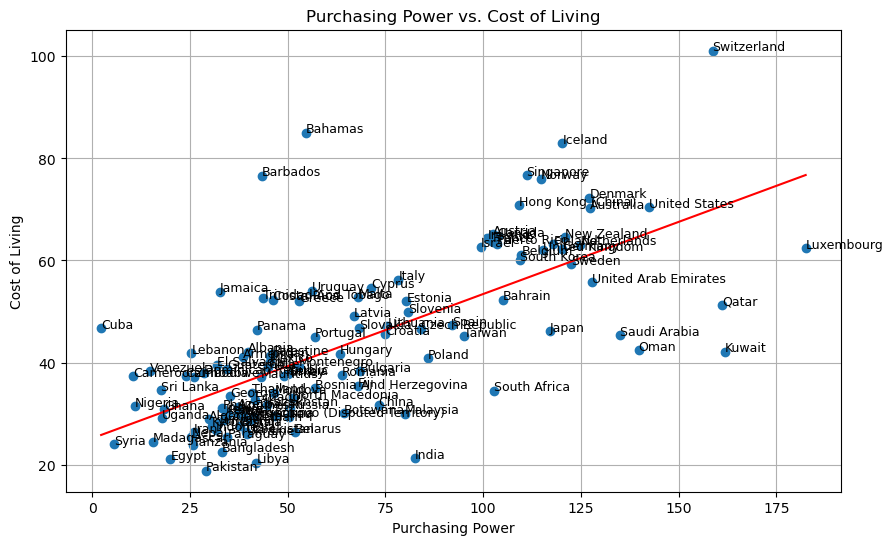

In [870]:
scatter(df, 'Purchasing Power','Cost of Living', title='Purchasing Power vs. Cost of Living')

* Cost of Living is Too High: **Switzerland** & **Bahamas**  
* Cost of Living is slightly cheap: **Hungary** & **United Arab Emirates**. This is where most countries are.  
* Cost of Living is Very Low: **India** & **Kuwait**

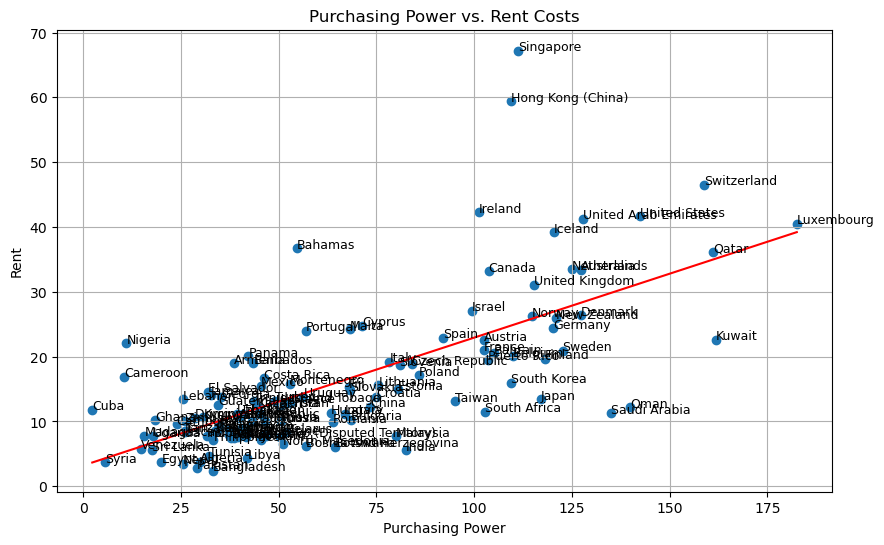

In [573]:
scatter(df, 'Purchasing Power','Rent', title='Purchasing Power vs. Rent Costs')

* Rent is Too High: **Singapore** & **Hong Kong**  
* Rent is slightly cheap: **Austria** & **Germany**. This is where most countries are.  
* Rent is Very Low: **Oman** & **Saudi Arabia**

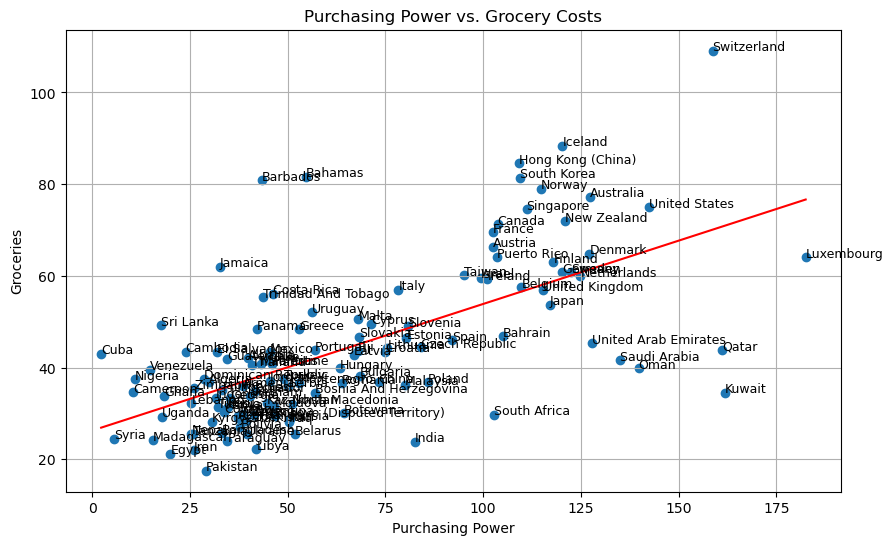

In [574]:
scatter(df, 'Purchasing Power','Groceries', title='Purchasing Power vs. Grocery Costs')

* Grocery Prices are Too High: **Switzerland** & **Bahamas**  
* Grocery Prices are slightly cheap: **Uganda** & **Japan**. 
* Grocery Prices are Very Low: **Kuwait** & **India**

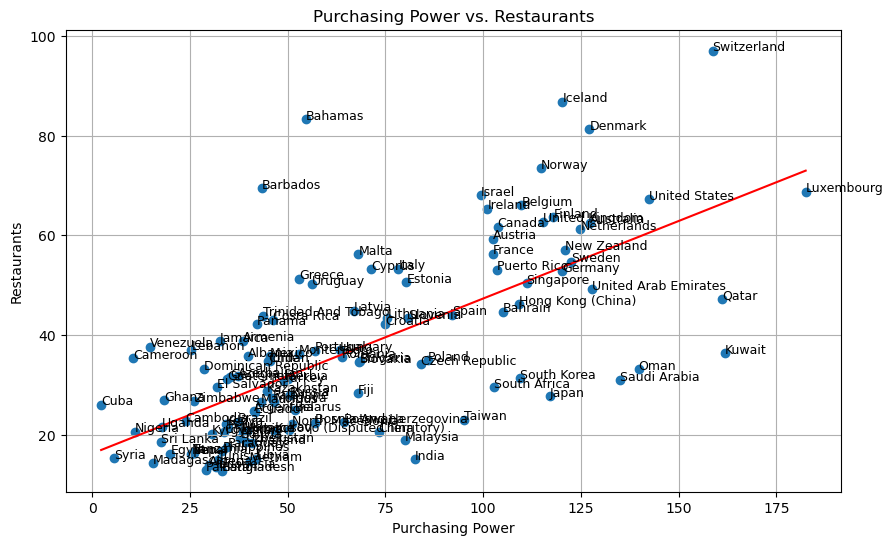

In [575]:
scatter(df, 'Purchasing Power','Restaurants', title='Purchasing Power vs. Restaurants')

* Restaurant Prices are Too High: **Switzerland** & **Iceland**  
* Restaurant Prices are slightly cheap: **Hong Kong** & **Singapore**. 
* Restaurant Prices are Very Low: **India** & **Japan**

**Residuals:** how far above and below the trend line each data point is
  
>In other words, relative to a countries purchasing power, how much higher or lower are the 'Expected Costs' of Living, Rent, Groceries, and Restaurants?

In [871]:
def create_residuals(model, df, col):
    y = df[col]
    X = df.drop(columns=col)
    
    model.fit(X, y)
    predictions = model.predict(X)

    return y - predictions

In [933]:
df2 = df.copy()

compare_cols = ['Rent', 'Groceries', 'Restaurants']
for col in compare_cols:
    df2[col + ' Residual'] = create_residuals(LinearRegression(), df2[['Purchasing Power', col] + [x for x in compare_cols if x != col]], col)

The above columns are created to find the countries with the highest Rent, Groceries, Restaurants relative to their Purchasing Power and overall Cost of Living.
>**Green** Countries have *lower* economic strain, lower costs and higher spending power.   
  **Red** Countries have *greater* economic strain, higher costs and lower purchasing power.  
 
  The 'Rent Residual' reflects how much a countries' Rent differs from its expected Rent based on its **cost of living** and **purchasing power.**

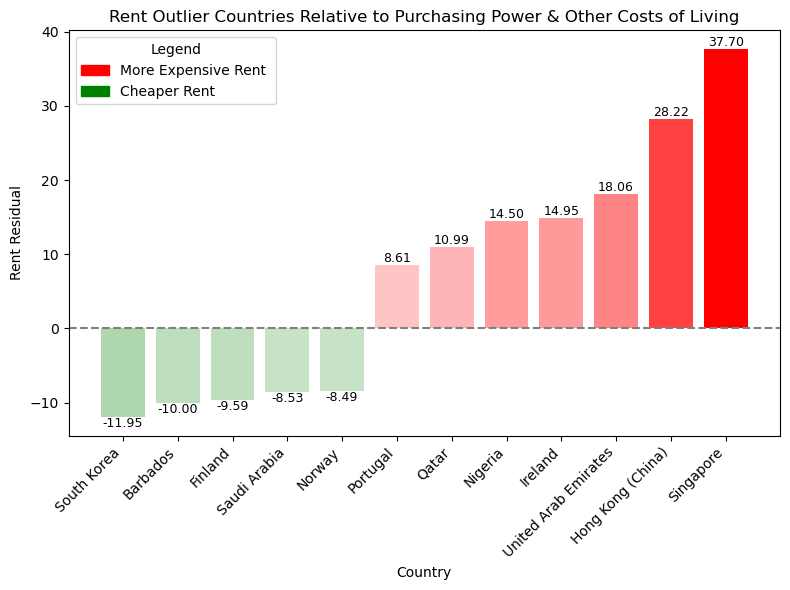

In [934]:
plot_column_values(df2[(df2['Rent Residual'] > 8) | (df2['Rent Residual'] < -8)], 'Rent Residual', 'Country',
                   title = 'Rent Outlier Countries Relative to Purchasing Power & Other Costs of Living')

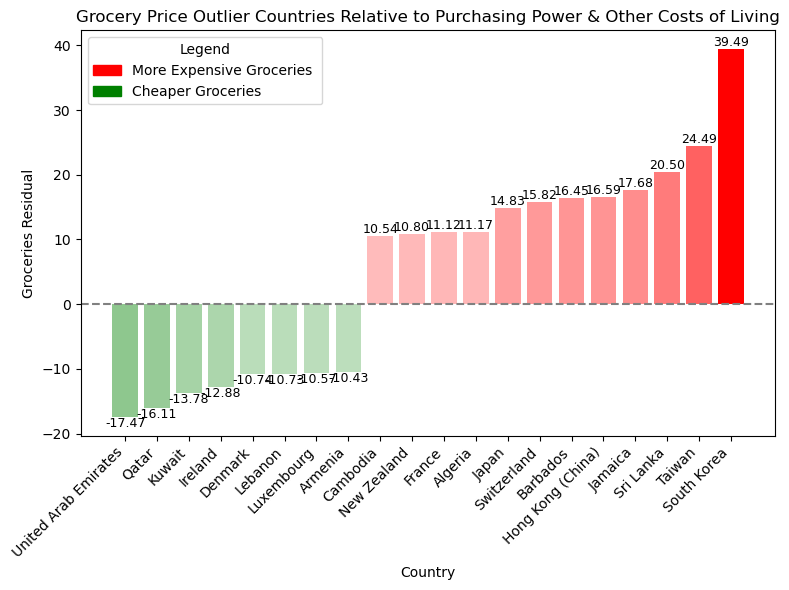

In [936]:
plot_column_values(df2[(df2['Groceries Residual'] > 10) | (df2['Groceries Residual'] < -10)], 'Groceries Residual', 'Country', 
                   title = 'Grocery Price Outlier Countries Relative to Purchasing Power & Other Costs of Living')

Lebanon and UAE have very low grocery prices. South Korea and Taiwan have very expensive grocery prices. 

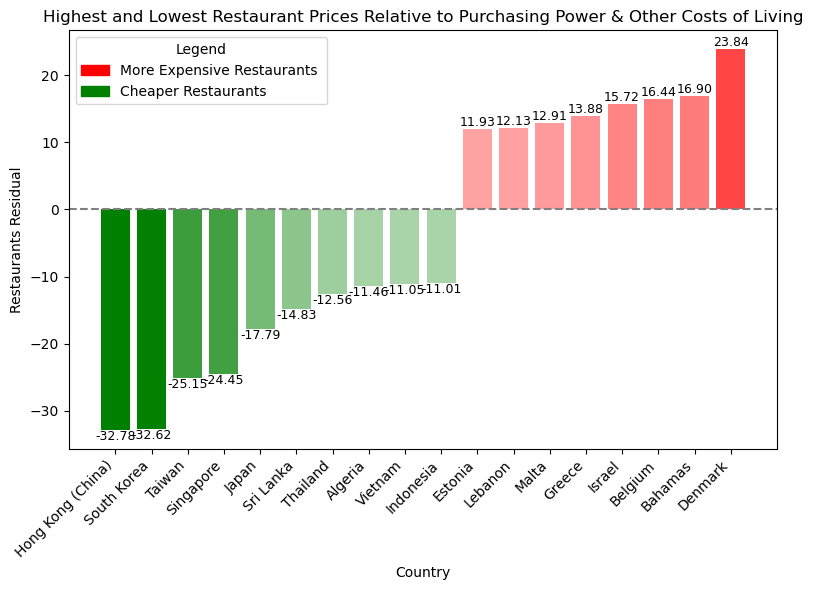

In [939]:
plot_column_values(df2[(df2['Restaurants Residual'] > 11) | (df2['Restaurants Residual'] < -11)], 'Restaurants Residual', 'Country',
                   title = 'Highest and Lowest Restaurant Prices Relative to Purchasing Power & Other Costs of Living')

Despite having expensive grocery costs, *South Korea* has very cheap restaurants. *Singapore and Hong Kong* have expensive rent, but cheaper restaurants.  
  
  Denmark has cheaper groceries, yet expensive restaurants. 

In [940]:
df2['Secondary Living Costs Residual'] = create_residuals(LinearRegression(), df2[['Purchasing Power', 'Cost of Living', 'Rent', 'Groceries','Restaurants']], 'Cost of Living')

'Cost of Living Residual' is the amount a countries' costs of living differs from the trend when accounting for purchasing power and rent, groceries, and restaurant prices.  
>In other words, it shows the costs of living in a country of everything *except* the costs of rent, groceries, and restaurants, such as things like **consumer goods, transportation, and utilities.** 

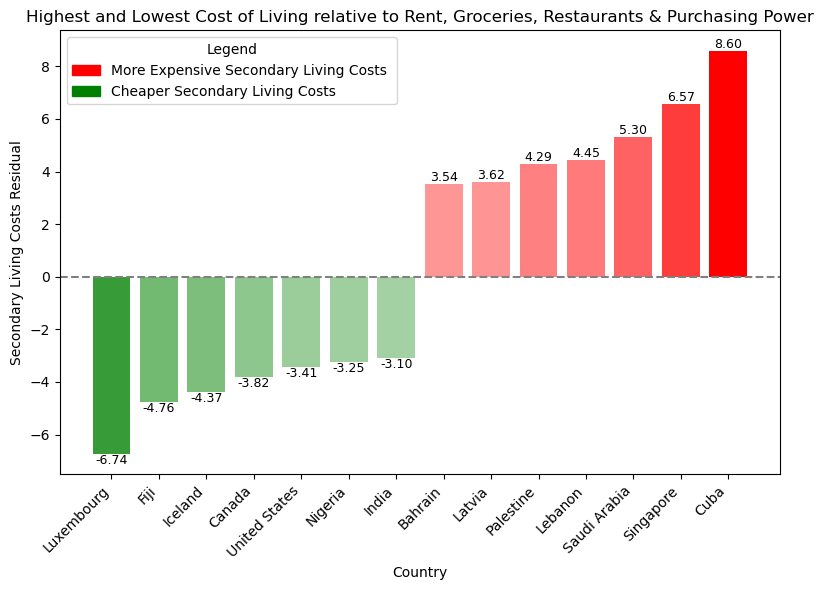

In [992]:
plot_column_values(df2[(df2['Secondary Living Costs Residual'] > 3.5) | (df2['Secondary Living Costs Residual'] < -3.1)], 'Secondary Living Costs Residual', 'Country',
                   title = 'Highest and Lowest Cost of Living relative to Rent, Groceries, Restaurants & Purchasing Power')

Luxembourg has very cheap utilities and consumer goods. United States is known for having cheaper than average consumer goods. 

Cuba is expensive! Even though rent is cheaper than average

In [942]:
resid_cols = ['Secondary Living Costs Residual', 'Rent Residual', 'Groceries Residual', 'Restaurants Residual']

In [978]:
df2['Total Residual'] = df2['Rent Residual']*1.5 + df2['Groceries Residual'] + df2['Restaurants Residual']*0.5 + df2['Secondary Living Costs Residual']
df2['Total Abs Residual'] = df2['Rent Residual'].abs()*1.5 + df2['Groceries Residual'].abs() + df2['Restaurants Residual'].abs()*0.5 + df2['Secondary Living Costs Residual'].abs()

'Total Abs Residual':
* Higher Value = More variation within costs, overall more deviations from trend lines
* Lower value = Less variation within costs, overall less deviations from trend lines


'Total Residual':
* Higher Value = Overall More Expensive
* Lower value = Overall Cheaper  

### Countries with Highest Variation within Costs:

In [979]:
df2.sort_values(by='Total Abs Residual', ascending = False).head(15)

,Rank,Country,Cost of Living,Rent,Groceries,Restaurants,Purchasing Power,Rent Residual,Groceries Residual,Restaurants Residual,Secondary Living Costs Residual,Total Residual,Total Abs Residual
7,8,Hong Kong (China),70.8,59.4,84.6,46.2,109.3,28.218940,16.593079,-32.780875,-1.683517,40.847535,76.995444
3,4,Singapore,76.7,67.2,74.6,50.4,111.1,37.698778,0.974468,-24.449028,6.571309,51.869430,76.318458
23,24,South Korea,60.1,16.0,81.4,31.4,109.4,-11.947056,39.490916,-32.621652,0.011511,5.271017,73.733837
48,49,Taiwan,45.2,13.1,60.1,23.0,95.1,-7.019489,24.485191,-25.151784,-0.842614,0.537453,48.432930
26,27,United Arab Emirates,55.8,41.3,45.3,49.2,127.9,18.061520,-17.467477,0.090799,3.484509,13.154712,48.089667
13,14,Ireland,64.4,42.3,59.3,65.3,101.1,14.951428,-12.882724,8.593981,-0.832792,13.008616,40.439648
76,77,Sri Lanka,34.6,5.6,49.3,18.5,17.5,-5.112537,20.500807,-14.832130,-3.084758,2.331178,38.670436
4,5,Barbados,76.6,19.0,80.8,69.4,43.5,-10.000502,16.451335,9.553941,2.432836,8.660388,38.661895
45,46,Japan,46.1,13.4,53.7,27.8,117.0,-7.584501,14.827050,-17.787184,1.204304,-4.238990,36.301698
36,37,Qatar,51.3,36.1,43.9,47.2,161.1,10.994788,-16.107984,-1.800939,0.855276,0.339005,34.355911


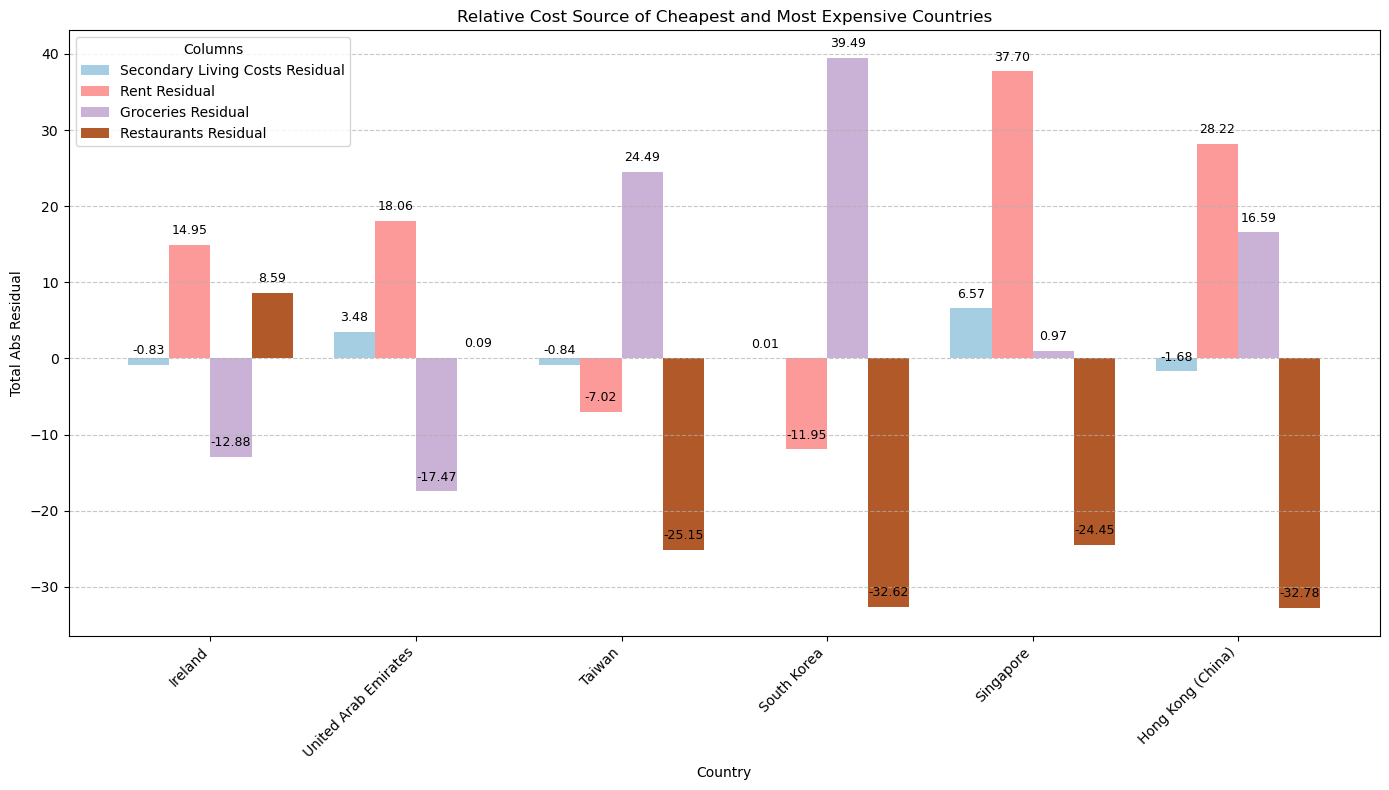

In [980]:
plot_grouped_bars(df2[df2['Total Abs Residual'] > 40], resid_cols, 'Country', 'Total Abs Residual', title='Relative Cost Source of Cheapest and Most Expensive Countries')

If you are rich enough to afford your own place and rent another one out, you may be interested in moving to Singapore or Hong Kong. 

# Top 10 Cheapest Countries

In [991]:
df2.sort_values(by='Total Residual').head(10)

,Rank,Country,Cost of Living,Rent,Groceries,Restaurants,Purchasing Power,Rent Residual,Groceries Residual,Restaurants Residual,Secondary Living Costs Residual,Total Residual,Total Abs Residual
117,118,India,21.2,5.6,23.8,15.1,82.6,-3.147479,-3.991359,-6.089138,-3.100468,-14.857614,14.857614
50,51,Oman,42.4,12.2,39.9,33.1,139.8,-7.943583,-1.934255,-4.679023,2.259433,-13.929708,18.448575
77,78,South Africa,34.5,11.5,29.7,29.5,102.8,-2.651020,-9.189736,1.253451,1.022507,-11.517033,14.815498
51,52,Kuwait,42.1,22.6,34.5,36.4,161.8,1.579878,-13.775749,-2.472218,1.970303,-10.671738,19.351977
22,23,Belgium,61.1,20.1,57.5,66.0,109.8,-7.579720,-6.301005,16.440168,-0.899338,-10.349839,26.790008
47,48,Saudi Arabia,45.3,11.3,41.6,30.9,134.9,-8.531791,1.488102,-7.382113,5.298595,-9.702044,23.275440
119,120,Libya,20.4,4.3,22.2,15.2,42.0,-0.946857,-4.515645,-1.674997,-2.756561,-9.529989,9.529989
109,110,Belarus,26.4,8.3,25.4,24.9,51.8,-0.100262,-8.744601,4.042064,-2.539618,-9.413580,13.455644
16,17,Finland,63.2,19.7,63.0,63.6,118.0,-9.594011,0.640003,9.963362,-0.582961,-9.352294,20.595661
6,7,Denmark,72.3,26.4,64.8,81.3,127.2,-6.968081,-10.744379,23.842663,0.065691,-9.209478,33.183522


Relative to its purchasing power, Oman is extremely cheap. 

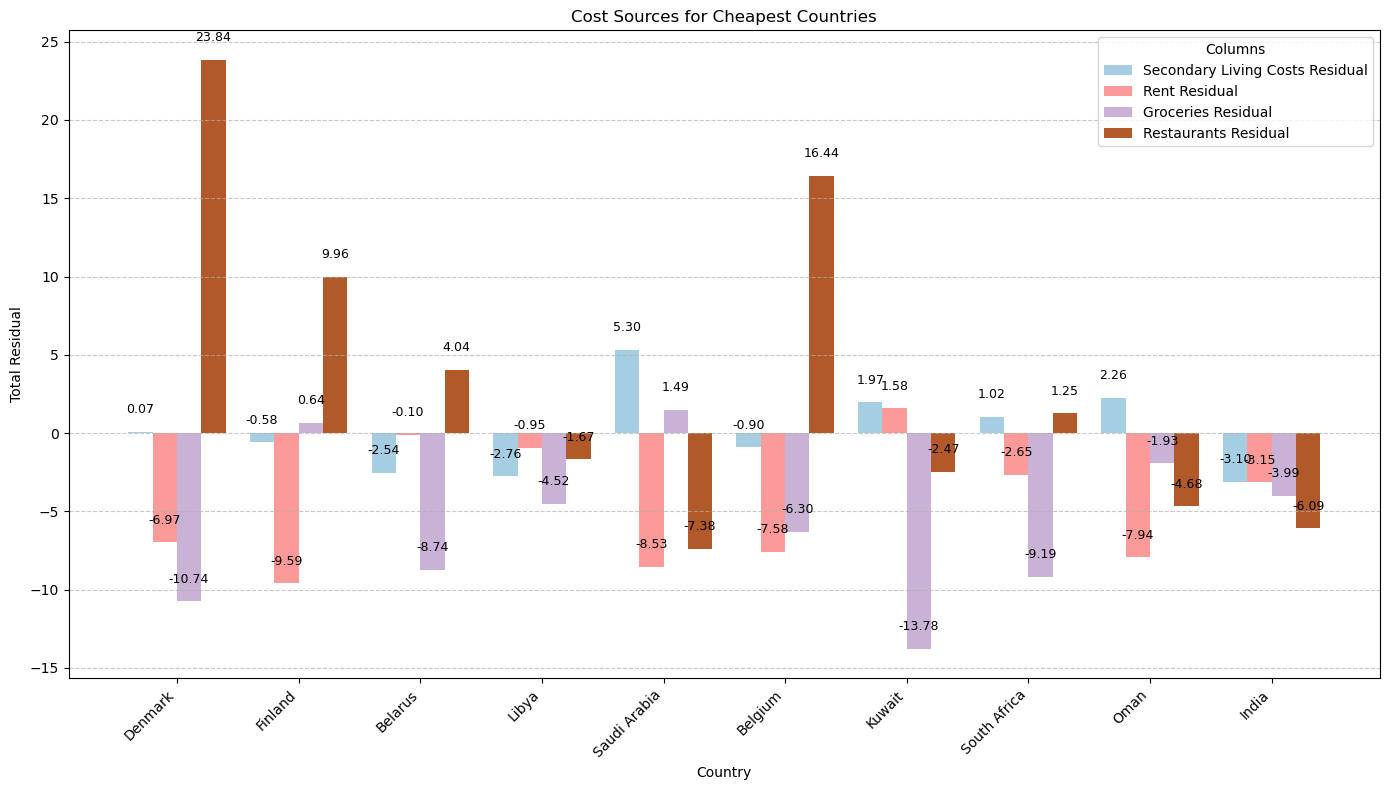

In [983]:
plot_grouped_bars(df2[df2['Total Residual'] < -9], resid_cols, 'Country', 'Total Residual', asc=False, title='Cost Sources for Cheapest Countries')

# Top 10 Most Expensive Countries

In [990]:
df2.sort_values(by='Total Residual', ascending=False).head(10)

,Rank,Country,Cost of Living,Rent,Groceries,Restaurants,Purchasing Power,Rent Residual,Groceries Residual,Restaurants Residual,Secondary Living Costs Residual,Total Residual,Total Abs Residual
3,4,Singapore,76.7,67.2,74.6,50.4,111.1,37.698778,0.974468,-24.449028,6.571309,51.869430,76.318458
7,8,Hong Kong (China),70.8,59.4,84.6,46.2,109.3,28.218940,16.593079,-32.780875,-1.683517,40.847535,76.995444
1,2,Bahamas,85.0,36.7,81.6,83.3,54.6,4.356723,1.840074,16.895380,2.977469,19.800318,19.800318
42,43,Cuba,46.7,11.8,43.0,26.0,2.3,2.599417,7.551162,-3.952597,8.601561,18.075549,22.028147
85,86,Nigeria,31.4,22.1,37.5,20.6,11.0,14.502009,0.939022,-9.407836,-3.249310,14.738808,30.645264
26,27,United Arab Emirates,55.8,41.3,45.3,49.2,127.9,18.061520,-17.467477,0.090799,3.484509,13.154712,48.089667
13,14,Ireland,64.4,42.3,59.3,65.3,101.1,14.951428,-12.882724,8.593981,-0.832792,13.008616,40.439648
0,1,Switzerland,101.1,46.5,109.1,97.0,158.7,-2.991207,15.819572,2.241844,-1.378173,11.075510,22.805477
49,50,Portugal,45.1,24.0,43.8,36.9,56.9,8.612891,-3.750312,-1.063945,0.685280,9.322332,17.886902
29,30,Jamaica,53.9,14.1,62.0,38.8,32.7,-4.311272,17.681815,-6.474279,1.189856,9.167623,28.575719


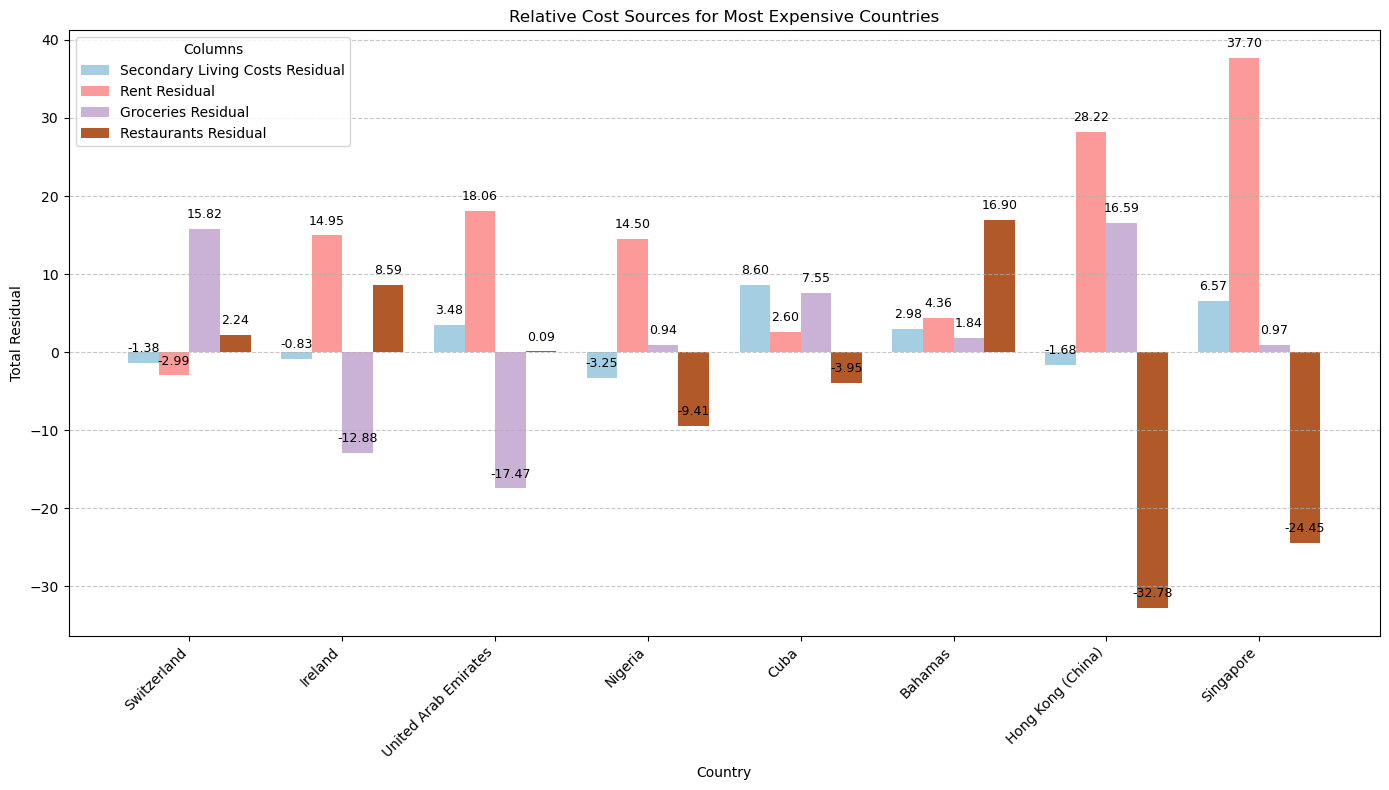

In [987]:
plot_grouped_bars(df2[df2['Total Residual']  > 10], resid_cols, 'Country', 'Total Residual', title='Relative Cost Sources for Most Expensive Countries')

## Conclusion:
Singapore and Hong Kong are a good place to move if you are wealthy and able to buy property to avoid the rental market. Cuba, Bahamas, and Nigeria are expensive, without providing adequate purchasing power. Despite having expensive restaurants, Denmark Belgium, and Finland are very liveable. Oman, Kuwait, and South Africa provide a very high purchasing power and low costs. India is the cheapest place to live.

In [825]:
def plot_grouped_bars(df, cols, x_label_col, sort_col, asc=True, title=None):
    if x_label_col not in df.columns:
        raise ValueError(f"Column '{x_label_col}' does not exist in the DataFrame")

    if any(col not in df.columns for col in cols):
        raise ValueError(f"One or more columns in 'cols' do not exist in the DataFrame")

    df_sorted = df.sort_values(by=sort_col, ascending=asc)
    
    x_ticks = df_sorted[x_label_col]
    x_positions = np.arange(len(x_ticks))
    
    num_cols = len(cols)
    
    # Generate distinct colors for each column
    colors = plt.cm.Paired(np.linspace(0, 1, num_cols))  # Use a colormap to get distinct colors
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Width of each bar group
    bar_width = 0.8 / num_cols  # Adjust the width of each bar within a group

    for i, col in enumerate(cols):
        x_offsets = x_positions + (i - (num_cols - 1) / 2) * bar_width
        bars = ax.bar(x_offsets, df_sorted[col], width=bar_width, color=colors[i], label=col)
        
        # Label each bar with its height
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, height + 1, f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    # Add grid lines for y-axis
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-axis ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_ticks, rotation=45, ha='right')
    
    ax.set_xlabel(x_label_col)
    ax.set_ylabel(sort_col)
    if title:
        ax.set_title(title)
    
    ax.legend(title='Columns')
    plt.tight_layout()
    plt.show()

In [725]:
def plot_stacked_bars(df, cols, x_label_col, sort_col, asc=True, title=None):
    if x_label_col not in df.columns:
        raise ValueError(f"Column '{x_label_col}' does not exist in the DataFrame")

    if any(col not in df.columns for col in cols):
        raise ValueError(f"One or more columns in 'cols' do not exist in the DataFrame")

    df_sorted = df.sort_values(by=sort_col, ascending=asc)
    
    x_ticks = df_sorted[x_label_col]
    x_positions = np.arange(len(x_ticks))
    
    num_cols = len(cols)
    
    # Generate distinct colors for each column
    colors = plt.cm.tab10(np.linspace(0, 1, num_cols))  # Use a colormap to get distinct colors
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Initialize bottom for stacking
    bottoms = np.zeros(len(df_sorted))
    
    # Plot each column's data
    for i, col in enumerate(cols):
        data = df_sorted[col]
        if np.any(data < 0):
            # Separate positive and negative values
            positive_data = np.where(data > 0, data, 0)
            negative_data = np.where(data < 0, data, 0)
            
            # Plot positive values
            ax.bar(x_positions, positive_data, width=0.6, color=colors[i], label=f'{col} (positive)', bottom=bottoms)
            
            # Plot negative values
            ax.bar(x_positions, negative_data, width=0.6, color=colors[i], label=f'{col} (negative)', bottom=bottoms + positive_data)
            
            # Update the bottom positions
            bottoms += positive_data
            bottoms += negative_data
        else:
            # Plot only positive values if all values are non-negative
            ax.bar(x_positions, data, width=0.6, color=colors[i], label=col, bottom=bottoms)
            bottoms += data
    
    # Calculate statistics for axis limits and dashed lines
    y_max = np.max(bottoms)
    y_min = np.min(bottoms)
    y_std = np.std(bottoms)
    
    lower_limit = y_min - y_std
    upper_limit = y_max + y_std
    
    # Set y-axis limits
    ax.set_ylim(lower_limit, upper_limit)
    
    # Add dashed lines every 10 units
    for y in range(int(lower_limit) - (int(lower_limit) % 10), int(upper_limit) + 10, 10):
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_ticks, rotation=45, ha='right')
    
    ax.set_xlabel(x_label_col)
    ax.set_ylabel(sort_col)
    if title:
        ax.set_title(title)
    
    ax.legend(title='Columns')
    plt.tight_layout()
    plt.show()

In [780]:
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch

def plot_column_values(df, col, x_label_col, asc=True, title=None):
    if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in the DataFrame")
    if x_label_col not in df.columns:
        raise ValueError(f"Column '{x_label_col}' does not exist in the DataFrame")

    df_sorted = df.sort_values(by=col, ascending=asc)
    
    distances = np.abs(df_sorted[col])
    norm = Normalize(vmin=0, vmax=distances.max())
    
    cmap_red = LinearSegmentedColormap.from_list("red_map", ["white", "red"])
    cmap_green = LinearSegmentedColormap.from_list("green_map", ["white", "green"])

    def get_color(value):
        if value >= 0:
            return cmap_red(norm(abs(value)))
        else:
            return cmap_green(norm(abs(value)))

    fig, ax = plt.subplots(figsize=(8, 6))
    
    x_ticks = df_sorted[x_label_col].values
    x_positions = np.arange(len(x_ticks))
    
    for index, row in df_sorted.iterrows():
        color = get_color(row[col])
        ax.bar(x_positions[df_sorted.index.get_loc(index)], row[col], color=color)
        ax.text(x_positions[df_sorted.index.get_loc(index)], row[col], f'{row[col]:.2f}', ha='center', va='bottom' if row[col] >= 0 else 'top', fontsize=9)
    
    ax.axhline(y=0, color='gray', linestyle='--')
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_ticks, rotation=45, ha='right')
    
    ax.set_xlabel(x_label_col)
    ax.set_ylabel(col)
    if title:
        ax.set_title(title)
    handles = [
        Patch(color=cmap_red(norm(distances.max())), label='More Expensive ' + col.replace('Residual','')),
        Patch(color=cmap_green(norm(distances.max())), label='Cheaper ' + col.replace('Residual',''))
    ]
    ax.legend(handles=handles, title='Legend')        
    plt.tight_layout()
    plt.show()

In [126]:
def scatter(df, x, y, label='Country', title=None):
    plt.figure(figsize=(10, 6))

    plt.scatter(df[x], df[y])
    
    for i, row in df.iterrows():
        plt.text(row[x], row[y], row[label], fontsize=9)

    plt.xlabel(x)
    plt.ylabel(y)

    if title:
        plt.title(title)

    X = df[[x]].values
    y_values = df[y].values  
    model = LinearRegression()
    model.fit(X, y_values)

    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    plt.plot(x_range, y_pred, color='red')

    plt.grid(True)
    plt.show()